## The Data Scientist’s Guide To Buying Wine
Isolating the chemicals that make wine great.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data and preprocessing

In [2]:
# Importing the red wine data set and then delimiting
wine_data_red = pd.read_csv("winequality-red.csv", delimiter = ';')
wine_data_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Importing the white wine data
wine_data_white = pd.read_csv("winequality-white.csv", delimiter = ';')
wine_data_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
# Let us add the type 'column' to identify whether the wine is red or white
wine_data_red['type'] = ['red']*len(wine_data_red)
wine_data_white['type'] = ['white']*len(wine_data_white)

In [5]:
wine_data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
wine_data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [7]:
# Combining both datasets
wine_data_df = wine_data_red.append(wine_data_white, ignore_index=True)

In [8]:
wine_data_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [9]:
# A random sample
wine_data_df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2732,8.7,0.22,0.42,2.3,0.053,27.0,114.0,0.99400,2.99,0.43,10.0,5,white
6327,7.2,0.21,0.31,10.5,0.035,36.0,122.0,0.99478,3.12,0.40,10.6,6,white
3673,6.6,0.22,0.28,4.9,0.042,51.0,180.0,0.99520,3.30,0.75,9.5,6,white
1869,6.9,0.32,0.26,8.3,0.053,32.0,180.0,0.99650,3.25,0.51,9.2,6,white
4827,6.8,0.27,0.42,7.3,0.054,58.0,200.0,0.99556,3.12,0.49,9.4,6,white
3706,8.1,0.24,0.33,10.2,0.048,46.0,141.0,0.99720,3.16,0.48,10.3,6,white
2451,6.9,0.18,0.36,1.3,0.036,40.0,117.0,0.99340,3.27,0.95,9.5,7,white
3610,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,5,white
2730,6.9,0.23,0.34,4.0,0.047,24.0,128.0,0.99440,3.20,0.52,9.7,6,white
6300,6.4,0.69,0.09,7.6,0.044,34.0,144.0,0.99480,3.26,0.38,10.1,6,white


### What exactly do these chemicals imply for consumers?

Fixed Acidity: Gives wine a tart flavor. If there’s too little, wine tastes “flat”.

Citric Acid: Often used as a flavor additive. Adds a fresh, tart taste.

Volatile Acidity: In contrast to citric acid, this is gaseous acidity that can smell like vinegar; its presence is less likely to be intentional.

Residual Sugar: Correlates with sweetness. This is the sugar left over when grapes finish fermenting. “Dry wines” tend to have lower sugar.

Sulfur: Additive to prevent bacterial growth. In my research, it was contested whether or not there is a smell or taste associated with it.

Chlorides: The measure of salt.

### It looks like there’s both red and white bottles in this dataset. Is the distribution even?

quality  type 
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
dtype: int64

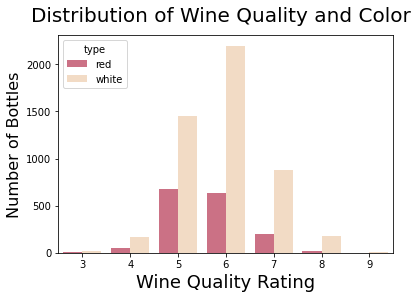

In [10]:
# We graph the distribution so we see how many red vs white bottles we have

# plt.rcParams["font.family"] = "avenir"
plt.suptitle("Distribution of Wine Quality and Color", fontsize=20)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=16)

ax = sns.countplot(
    x="quality", hue="type", data=wine_data_df, palette=["#da627d", "#f9dbbd"]
)
ax.set(xlabel="Wine Quality Rating", ylabel="Number of Bottles")

wine_data_df.groupby(["quality", "type"]).size()

From this, we can see we have an imbalance in our data. For this demo, we’re just visualizing static data, so while the overrepresentation is worth noting, it’s not the end of the world.

But if we were trying to train a machine learning model with this data, it would be problematic. Why? Because certain categories are over or under-represented, so unless we do an intervention, it could lead to an issue with our model becoming biased.

### Is There Any Difference In Chemical Composition Between Different Ratings of Wine?
If quality is just a rating of flavor, and flavor is a mixture of chemicals, wines with different ratings should have different chemical ratios, right?

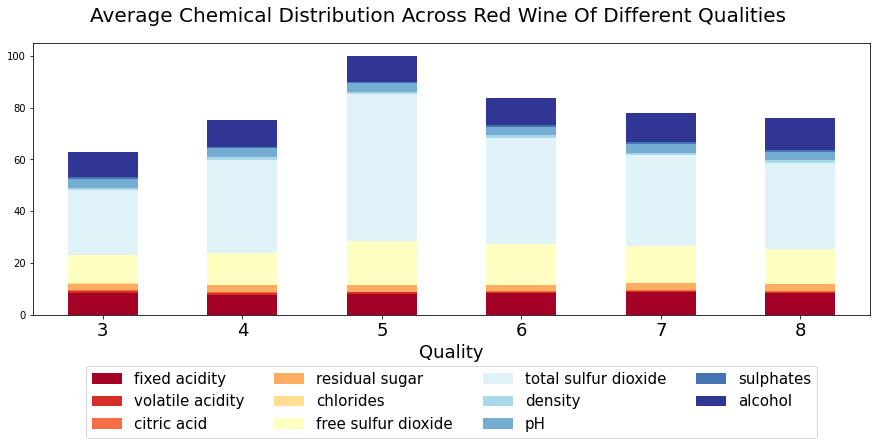

In [11]:
### Let’s test this theory on our red wine bottles!
wine_data_red.groupby(['quality']).mean().plot.bar(stacked=True, cmap="RdYlBu", figsize=(15, 5))

plt.suptitle(
    "Average Chemical Distribution Across Red Wine Of Different Qualities", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Quality", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)

At first glance, the chemicals follow a bell curve distribution, and an 8-star wine looks no different than a 4-star wine. That doesn’t sound intuitive.

That said, I think the data is scattered across too many wine-quality groupings. I’m thinking if we group them properly, we’ll find a more meaningful relationship.

We don’t care about the difference is between a 3 and 4-star bottle. We want to see what makes a bottle *phenomenal*.

We need to identify what causes the jump in quality between a 3 and an 8, not a 5 and a 6. So instead, let’s categorize a wine as “terrible”, “average”, and “phenomenal”.

### Let's break it down into 3 different wine categories, for each type

In [12]:
# Beginning with red
category = []

for row in wine_data_red['quality']:
    if row >= 7:
        category.append('Phenomenal')
    elif row <= 4:
        category.append('Terrible')
    else:
        category.append('Average')

wine_data_red['category'] = category

In [13]:
# Then remove the rating since we no longer need to differentiate based off of it
wine_data_red.drop(['quality'], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red,Average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,red,Average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,red,Average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,red,Average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,red,Average
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,red,Average
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,red,Average
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,red,Average


In [14]:
#Let's customize how the X axis is sorted. 
# Given they're categorical variables, I want them in a very specific order now.
wine_data_red['category'] = pd.Categorical(wine_data_red['category'], ['Terrible', 'Average', 'Phenomenal'])
wine_data_red.sort_values(by='category')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,category
1124,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.50,4,red,Terrible
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3,red,Terrible
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.10,4,red,Terrible
1263,8.2,0.780,0.00,2.2,0.089,13.0,26.0,0.99780,3.37,0.46,9.60,4,red,Terrible
1521,6.9,0.480,0.20,1.9,0.082,9.0,23.0,0.99585,3.39,0.43,9.05,4,red,Terrible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,8.7,0.520,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.60,7,red,Phenomenal
997,5.6,0.660,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.80,7,red,Phenomenal
290,8.7,0.520,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.60,7,red,Phenomenal
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.00,7,red,Phenomenal


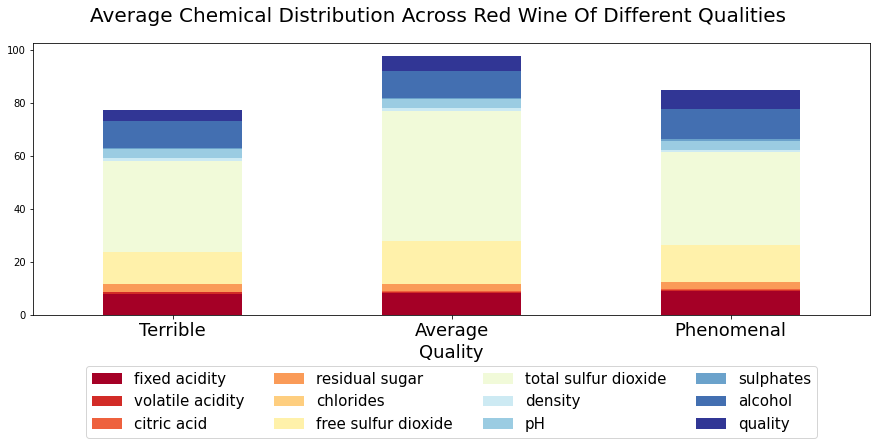

In [15]:
# And last, let's group it by quality category
wine_data_red.groupby(['category']).mean().plot.bar(stacked=True, cmap="RdYlBu", figsize=(15, 5))

plt.suptitle('Average Chemical Distribution Across Red Wine Of Different Qualities', fontsize=20)
plt.xticks(size = 18, rotation = 'horizontal')
plt.xlabel('Quality', fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol= 4, fontsize = 15)

In [16]:
wine_data_red.groupby('category').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
category,,,,,,,,,,,,
Terrible,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
Average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
Phenomenal,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


The average content of each chemical amongst each category of red wine.

### What trends do we see in red wines?
By grouping our wines more intuitively, we uncover a few valuable relationships.

1. Low Salt: On average, the worst red wines have the greatest amount of chlorides. This makes sense given chlorides measured that “salty” character. “Phenomenal” wine has the least.


2. Acidity Matters: “phenomenal” wines have the least amount of volatile acidity, and the greatest amount of citric acid. Given what we know about wine acids, this makes sense: the citric acid was likely deliberately introduced because it gives the wine a pleasant taste, but the volatile acids were likely a product of poor fermentation.


3. Alcohol is King: The best red wines have the most alcohol.

Now that we have a profile for each category of wine, are there any additional relationships we can explore that could help explain why each snapshot looks the way it does?
Let’s see if there are any other correlations between chemicals present in the wine.

### Let’s see if there are any other correlations between chemicals present in the wine.

Text(0.5, 1.0, 'Correlations Between Compounds In Red Wine')

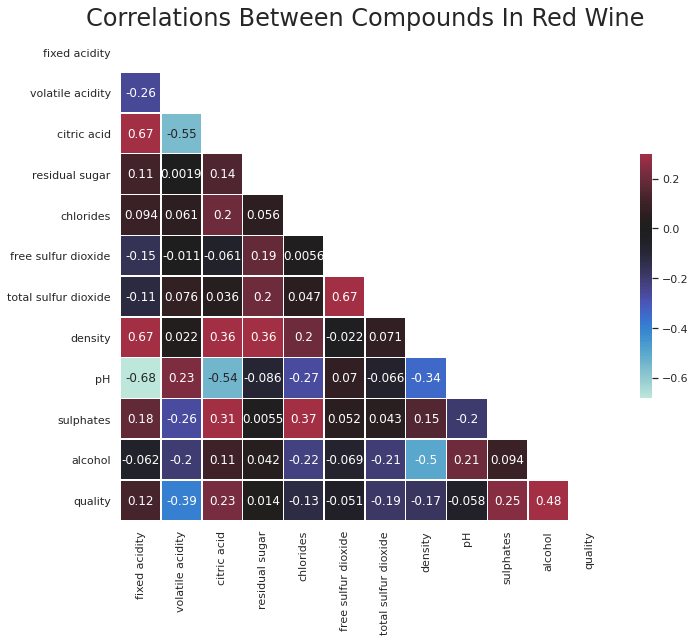

In [17]:
sns.set_theme(style='white')

corr = wine_data_red.corr()

# Return a copy of an array with the elements below the k-th diagonal zeroed.
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap="icefire",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Compounds In Red Wine", size=24)

Interestingly, this graph confirms what we just deduced: for red wines, alcohol content has a relatively strong correlation with wine quality rating (.48), followed by volatile acidity (-.39).


Some of the other correlations can be contextualized via basic chemistry . For example, alcohol is less dense than water, so it makes sense that more alcohol would be correlated with a lower wine density.


Likewise, we would expect there to be a strong correlation between pH and Acidity, given pH measures whether a substance leans towards being an acid or a base.

### Could it really be that the best red wines are just the ones with the highest alcohol content?
According to my European colleagues, “no”. When I presented this notebook at work, they noted this model does not take into account the “soul of the wine- the fruity notes”.

They have a great point, and in the future, I do hope we have a dataset that notes specific flavors.


Until then, I am extremely confident that picking the wine with the highest alcohol content will increase the odds of us choosing a high quality bottle.

Text(0.5, 1.0, 'Alcohol vs. Sugar Content In Each Category of Wine')

<Figure size 432x288 with 0 Axes>

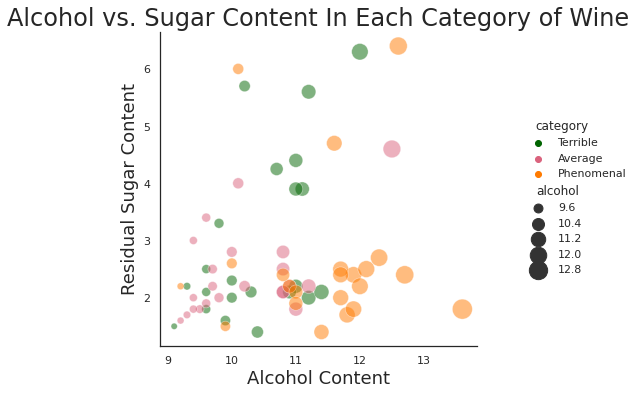

In [19]:
# Because there's an imbalance of wines in the dataset, let's only grab 20 of each category so it doesn't skew the plot

plt.suptitle(
    "Average Chemical Distribution Across Red Wine Of Different Qualities", fontsize=20
)

sns.relplot(
    x="alcohol",
    y="residual sugar",
    hue="category",
    size="alcohol",
    sizes=(40, 400),
    alpha=0.5,
    palette=["#006400", "#da627d", "#ff7b00"],
    height=5,
    data=wine_data_red.groupby("category")
    .apply(lambda x: x.sample(22))
    .reset_index(drop=True),
)

plt.xlabel("Alcohol Content", size=18)
plt.ylabel("Residual Sugar Content", size=18)

plt.title("Alcohol vs. Sugar Content In Each Category of Wine", size=24)

A scatterplot comparing the alcohol and sugar content of 22 wines from each category.

### But wait- we just analyzed red wine! Is there a difference in the correlations for a high quality white wine?

Text(0.5, 1.0, 'Correlations Between Compounds In White Wine')

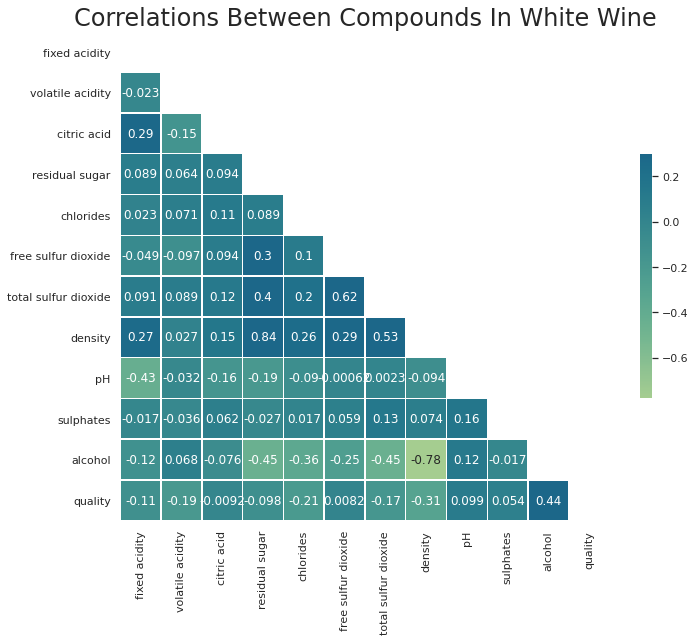

In [21]:
sns.set_theme(style='white')

corr2 = wine_data_white.corr()

# Return a copy of an array with the elements below the k-th diagonal zeroed.
mask = np.triu(np.ones_like(corr2, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr2,
    mask=mask,
    cmap="crest",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Compounds In White Wine", size=24)

Right off the bat, we see that even for white wines, alcohol content has the most positive correlation with quality. (0.44)

Compared to the red wines, for which the presence of citric acid had a 20% correlation with quality, the white wines had a 0% correlation between citric acid and quality.

I would hypothesize that, because citric acid is an additive that is deliberately added to red wine to enhance its flavor, it is unlikely a lower quality red bottle would have had it added.


In contrast, even the most terrible quality white wine had higher levels of citric acid than the average bottle of red.


I cannot be sure if these differences occur because citric acid naturally exists in higher concentrations in white wine, or if it is a more common practice to add it to white wine.


Ultimately, we need to research a little more to account for why this difference in correlations exists.

Additionally, the profiles of the two are definitely not the same.


At the chemical level, great white wines had 2–4 times the amount of sulfur than their red counterparts.


Given what we learned about sulfur as an additive to prevent spoilage, unless white wines have more naturally occurring sulfur, it is possible that to ferment the them necessitates extra protection as opposed to red (just as the red wine benefits from the addition of citric acid).


Additionally, white wines had half the amount of chlorides the reds did, but nearly twice as much sugar. They were also slightly less acidic.

### Despite these differences, the alcohol content of highly-quality red and white wines was roughly the same.

# So finally, what bottle should I buy?


Whether red or white, I think you’ll be happy with nearly any bottle with a high alcohol content. 

Citric acid content won’t make a difference when purchasing a white bottle, but it will often make or break your red.


Although this demo was fun, it’s important to acknowledge that we took a mathematical approach to describing one of the most romanticized, poetic substances in the world. Whereas a sommelier would describe the day as “breezy”, we described it as having “windspeeds of 5 MPH”. In being so precise, it is possible to lose something in translation.


That said, although we’ll be choosing our bottles more confidently, something tells me that my colleagues were right: sitting across your date, beaming “nice bottle, you can really taste the sulfur”, just doesn’t have the same ring to it.